In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

In [2]:
cifar_path = 'cs231n/datasets/cifar-10-batches-py'
x_train, y_train, x_test, y_test = load_CIFAR10(cifar_path)
x_train_origin = x_test #后面x_test会被格式化成一维数组,我们先保存一下.
y_train_origin = x_test #后面x_test会被格式化成一维数组,我们先保存一下.
x_test_origin = x_test #后面x_test会被格式化成一维数组,我们先保存一下.
y_test_origin = x_test #后面x_test会被格式化成一维数组,我们先保存一下.
print("training data:", x_train.shape)
print("training label:", y_train.shape)
print("testing data:", x_test.shape)
print("testing label:", y_test.shape)

training data: (50000, 32, 32, 3)
training label: (50000,)
testing data: (10000, 32, 32, 3)
testing label: (10000,)


In [3]:
## show train data topologies
## plot 5 labels with 6 pictures

data_class = ['plane', 'car', 'bird', 'cat', 'deer']
num_class = len(data_class)
for y, cls in enumerate(data_class):
    idx = np.flatnonzero(y_train==y) # 找到和y同值的坐标集合.
    #因为这个集合是很大的, 可以看到y_data是50000个label.我们不可能全部显示,只能显示部分.我们这里先显示5个.所以就从所有是y的label的集合中
    #random出5个,重新组成一个精简的集合.
    # np.random.choice 的param0是待被挑选的集合, param1是要挑出几个成员, param2是挑出的成员是否还放回之前的原集合中,false是不放回..
    idx = np.random.choice(idx, 5, replace=False)
    print("idx",idx)


## show train data topologies
## plot 10 labels with 10 pictures


idx [ 7592  7784  2780 19527  6479]
idx [35406 43547  4764 41701 31512]
idx [29090 37127 45131 12703 13107]
idx [41601 10814 24669 16322 25996]
idx [42653  9749  2926  8131 28797]


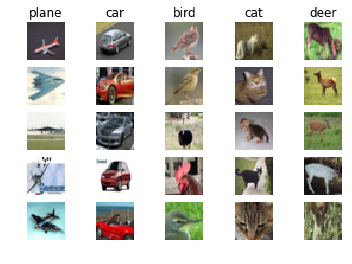

In [4]:
## show train data topologies
## plot 5 labels with 6 pictures

data_class = ['plane', 'car', 'bird', 'cat', 'deer']
num_class = len(data_class)
for y, cls in enumerate(data_class):
    idx = np.flatnonzero(y_train==y) # 找到和y同值的坐标集合.
    #因为这个集合是很大的, 可以看到y_data是50000个label.我们不可能全部显示,只能显示部分.我们这里先显示5个.所以就从所有是y的label的集合中
    #random出5个,重新组成一个精简的集合.
    # np.random.choice 的param0是待被挑选的集合, param1是要挑出几个成员, param2是挑出的成员是否还放回之前的原集合中,false是不放回..
    idx = np.random.choice(idx, 5, replace=False)
    #print("idx",idx)
    #想办法把上面的index集合从图上显示出来.
    #print("y",y)
    #print("cls",cls)
    for i, val_index in enumerate(idx):
        #print("i",i)
        #print("val_index",val_index)
        axi_x = i * num_class + 1+y
        #print("axi_x",axi_x)
        ##plt.subplot(2,1,1)， 表示创建一个2行，1列的图，p1为第一个子图
        plt.subplot(5, num_class, axi_x)
        plt.imshow(x_train[val_index].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()


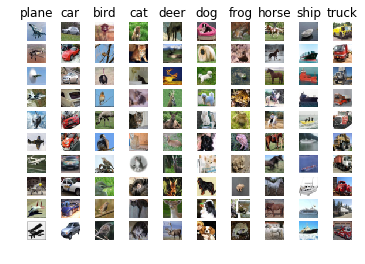

In [5]:
## show train data topologies
## plot 10 labels with 10 pictures
data_class = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_class = len(data_class)
sample_count = 10
for y, cls in enumerate(data_class):
    temp_index = np.flatnonzero(y_train==y)
    sample_index = np.random.choice(temp_index, sample_count, replace=False)
    for i, val_index in enumerate(sample_index):
        picture_location = i * sample_count + y +1
        plt.subplot(sample_count, num_class, picture_location)
        plt.imshow(x_train[val_index].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [6]:
## 对样本deci,得到一个小尺寸的图集
subsample_num_training = 5000
mask = range(subsample_num_training)
#print("mask", mask)
x_train = x_train[mask]
y_train = y_train[mask]
#print("x_train", x_train.shape)
subsample_num_testing = 500
mask = range(subsample_num_testing)
x_test = x_test[mask]
y_test = y_test[mask]
print("x_test", x_test.shape)
print("y_test", y_test.shape)

#把这些集合reshape成一行的
# np.reshape(set, (row,col)) col为-1时，是一行。
x_train = np.reshape(x_train, (x_train.shape[0],-1))
#y_train = np.reshape(y_train, (y_train.shape[0],-1))
#print("x_train.shape", x_train.shape)
#print("x_train", x_train)

x_test = np.reshape(x_test, (x_test.shape[0], -1))
#y_test = np.reshape(y_test, (y_test.shape[0], -1))

x_test (500, 32, 32, 3)
y_test (500,)


In [7]:
# 加载knn分类器,以后我们会去实现它
from cs231n.classifiers import KNearestNeighbor
knn_classifier = KNearestNeighbor()
knn_classifier.train(x_train, y_train)

In [8]:
#计算每个测试集和训练集的距离:
#假设测试集有Nte个, 训练集有Ntr个.那么需要 Nte*Ntr个结果.它们可以组成一个数组,行数是测试集个数,
#列数是训练集个数,对应的(i,j)元素是第i个测试集和第j个训练集的距离.
dist = knn_classifier.compute_distances_two_loops(x_test)
print("dist", dist.shape)

dist (500, 5000)


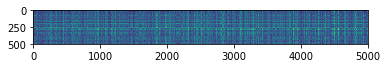

In [9]:
#实例化显示这个距离
#横坐标是训练集id,纵坐标是测试集id.里边的颜色深浅是对应的两者的距离值
plt.imshow(dist, interpolation='none')
plt.show()

dist.shape[0]= 500
dist[0] [3803.92350081 4210.59603857 5504.0544147  ... 4007.64756434 4203.28086142
 4354.20256764]
np.argsort(dist[0])= [ 420 3684 4224 ... 4375 2744 4601]
np.argsort(dist[0])[:1]= [420]
y_train [6 9 9 ... 5 4 6]
y_train[np.argsort(dist[0])[:1]] = [4]
output =  [1 3 1 1 0 0 0 1]
closet_y =  [4]
closet_y_count =  [0 0 0 0 1]
closet_y_count_max =  4
gusse_result =  deer
ture_result  =  cat
x_train[0] =  [ 59.  62.  63. ... 123.  92.  72.]


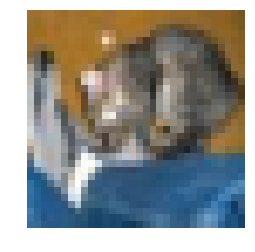

y_test_label [4. 9. 8. 8. 4. 4. 3. 2. 5. 8. 2. 8. 5. 7. 2. 2. 5. 3. 1. 4. 2. 0. 0. 6.
 2. 4. 2. 7. 2. 6. 6. 2. 4. 6. 8. 7. 2. 8. 4. 2. 8. 6. 2. 4. 9. 0. 5. 0.
 4. 2. 7. 8. 4. 3. 8. 8. 5. 0. 0. 4. 4. 6. 6. 3. 3. 2. 8. 8. 3. 9. 2. 4.
 8. 0. 4. 4. 6. 3. 6. 8. 8. 3. 5. 0. 7. 4. 3. 8. 8. 8. 0. 4. 8. 1. 4. 0.
 6. 0. 0. 8. 4. 7. 6. 4. 1. 1. 4. 6. 5. 5. 4. 0. 3. 0. 4. 4. 2. 2. 4. 6.
 8. 4. 4. 6. 8. 2. 0. 2. 6. 2. 2. 1. 0. 6. 6. 5. 9. 0. 2. 8. 2. 2. 6. 5.
 8. 4. 2. 5. 5. 8. 0. 3. 6. 0. 8. 4. 8. 8. 5. 4. 0. 4. 6. 4. 8. 0. 8. 6.
 5. 0. 8. 7. 8. 8. 4. 4. 0. 4. 4. 8. 8. 0. 2. 4. 0. 0. 6. 3. 8. 8. 3. 4.
 2. 2. 4. 4. 8. 8. 4. 2. 2. 4. 8. 2. 4. 2. 0. 2. 6. 0. 6. 2. 2. 2. 8. 2.
 0. 9. 0. 4. 7. 4. 7. 0. 3. 6. 2. 2. 4. 4. 3. 1. 2. 3. 8. 2. 4. 9. 5. 5.
 0. 4. 4. 0. 2. 2. 6. 0. 4. 2. 3. 6. 4. 2. 6. 4. 4. 8. 8. 4. 5. 4. 4. 2.
 4. 8. 8. 4. 7. 2. 2. 2. 6. 3. 8. 6. 0. 4. 5. 6. 7. 4. 6. 1. 8. 4. 5. 0.
 8. 8. 8. 2. 2. 2. 6. 4. 4. 0. 8. 4. 4. 2. 5. 2. 2. 8. 8. 4. 6. 2. 8. 5.
 0. 0. 3. 5. 2. 4. 3. 4. 5. 3. 6. 6. 6

In [10]:
print("dist.shape[0]=", dist.shape[0]) #这是个500x50000的矩阵
print("dist[0]", dist[0]) # 这是个5000列的一维数组.每个成员是第0个测试图片和对应第j个训练集图片的距离.
print("np.argsort(dist[0])=",np.argsort(dist[0])) #对这个一维数组做一个从小到大的排序,这样我们可以很方便的找到一个最小距离,这个argsort返回的是从小到到的index.而非具体的值
print("np.argsort(dist[0])[:1]=",np.argsort(dist[0])[:1]) #比如找到最近的一个距离,返回其index
temp = np.argsort(dist[0])[:1]
print("y_train", y_train)
print("y_train[np.argsort(dist[0])[:1]] =", y_train[np.argsort(dist[0])[:1]]) #为什么会用最近的那个值 作为 y_train的的index呢?  答; 因为argsort返回的是index.
closet_y =  y_train[np.argsort(dist[0])[:1]]
#先列一下np.bincount函数的用法
x = np.array([0, 1, 1, 3, 2, 1, 7])
output = np.bincount(x)
print("output = ", output)
#output =  [1 3 1 1 0 0 0 1]
#x中最大值是7,所以我们要对0~7的值都统计各自出现的次数.
#output中第一个1,代表0出现的次数.
#第二个3代表1出现的次数
#以此类推.
closet_y_count = np.bincount(closet_y)
print("closet_y = ", closet_y)
print("closet_y_count = ", closet_y_count)

x = np.array([0, 0, 0, 0, 1])
closet_y_count_max = np.argmax(x) # 数组中最大的那个值对应的index返回回来.
print("closet_y_count_max = ", closet_y_count_max)
guess_result = data_class[closet_y_count_max]
print("gusse_result = ", guess_result)
print("ture_result  = ", data_class[y_test[0]])
print('x_train[0] = ', x_train[0])
plt.imshow(x_train_origin[0].astype('uint8'))

plt.axis('off')
plt.show()

#上面是针对i==0的那个测试集的一个展开运算,计算出该测试集的最接近的训练集的index.
y_test_label = knn_classifier.predict_labels(dist, k=1) # 这个y_test_lable包含所有测试集的最接近的训练集的index
print("y_test_label", y_test_label)
#然后可以查表，找到对应的训练集的label
num_correct = np.sum(y_test_label==y_test)
print("nem_correct = ", num_correct)
print("num_test = ", subsample_num_testing)
print("correct ratio = ",num_correct/subsample_num_testing)


In [11]:
#上面是对于k=1的情况。当计算出每行的测试集的最小距离的训练集的label时，就选择那个最小的。
#很显然，会有一些的武断。如果我们多看一些结果，比如看和第i行的测试集的接近的训练集的最接近的k个
#训练集的label，然后让他们投票，取票数最大的那个label。这样会多少有点靠谱。
y_test_pred_withk5 = knn_classifier.predict_labels(dist, k=5)
num_correct_withk5 = np.sum(y_test_pred_withk5==y_test)
print("correct ration when k eqs 5 : ", num_correct_withk5/subsample_num_testing)
#correct ration when k eqs 5 :  0.278
#稍微高了一点点。

correct ration when k eqs 5 :  0.278


In [12]:
#前面用两个loop计算距离
#如何用一个loop计算距离？
#输入测试集。
num_test = x_test.shape[0]
num_train = x_train.shape[0]
print("x_test.shape:", x_test.shape)
print("x_train.shape:", x_train.shape)
print("x_test:", x_test)
print("x_train:", x_train)
print("num_test:", num_test)
print("num_train:", num_train)
dist = np.zeros((num_test,num_train))
print("dist:", dist)

print("step-1----------------------------")
#这个x_test是500x3072，x_train是5000x3072的。
#x_train - x_test[0] 是让5000行元素都对x_test[0]这个元素做减法。
print("x_train - x_test[0]:",x_train - x_test[0])


print("step-2----------------------------")
#设 x_train - x_test[0]为A0
#这个是对A0的每个元素都做平方。还是一个矩阵。
#这个也是做欧几里得范数的第一步
print("np.square(x_train - x_test[0]):", np.square(x_train - x_test[0]))


#做欧几里得范数的第二步，计算上文的平方和之后开方。
#np.sum的axis=0是按列求和
#np.sum的axis=1是按行求和
x1 = np.array([[1, -2], [2, 3]])
print("x1 in col:",np.sum(x1, axis =0))
print("x1 in row:",np.sum(x1, axis =1))


temp = np.square(x_train - x_test[0])
print("temp:", temp)
#print("np.sum(np.square(x_train - x_test[0]), axis = 1)"，np.sum(temp, axis = 1))
print("np.sum(np.square(x_train - x_test[0]), axis = 1):", np.sum(temp, axis=1))
print(" np.sqrt(np.sum(np.square(self.X_train - X[0]), axis = 1)):",np.sqrt(np.sum(temp, axis=1)))

# 以此类推，让x_train这个5000行元素，分别对x_test[0],x_test[1],...做减法。

for i in range(num_test):
    dist[i] = np.sqrt(np.sum(np.square(x_train - x_test[i]), axis = 1))
             
print("dist.shape:", dist.shape)
print("dist", dist)


x_test.shape: (500, 3072)
x_train.shape: (5000, 3072)
x_test: [[158. 112.  49. ...  21.  67. 110.]
 [235. 235. 235. ... 186. 200. 199.]
 [158. 190. 222. ...   7.   8.   7.]
 ...
 [ 74. 126. 176. ... 141. 199. 251.]
 [145. 162. 125. ... 117. 119. 105.]
 [185. 189. 188. ... 211. 212. 206.]]
x_train: [[ 59.  62.  63. ... 123.  92.  72.]
 [154. 177. 187. ... 143. 133. 144.]
 [255. 255. 255. ...  80.  86.  84.]
 ...
 [167. 163. 145. ...  42.  78.  84.]
 [154. 152. 125. ... 194. 247. 114.]
 [ 45.  32.  21. ... 156. 142. 100.]]
num_test: 500
num_train: 5000
dist: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
step-1----------------------------
x_train - x_test[0]: [[ -99.  -50.   14. ...  102.   25.  -38.]
 [  -4.   65.  138. ...  122.   66.   34.]
 [  97.  143.  206. ...   59.   19.  -26.]
 ...
 [   9.   51.   96. ...   21.   11.  -26.]
 [  -4.   40.   76. ...  173.  180.    4.]
 [-11

In [13]:
#前面的是利用2次loop和1次loop实现计算距离
#接下来我们不用loop尝试计算距离。
#计算测试集和训练集的距离

# ||l2_dist|| = sqrt( A^2 + B^2 -2AB )   ???
# d2(I1,I2) = sqrt(sum(I1^2-I2^2)^2)

#step1
print("x_test.shape", x_test.shape)
print("x_trian.shape", x_train.shape)
print("x_train.T.shape:", x_train.T.shape)
print("np.dot(x_test, x_train.T):", np.dot(x_test, x_train.T))
temp_dot = np.dot(x_test, x_train.T)
print("temp_dot.shape", temp_dot.shape)
#step2
temp = np.sum(np.square(x_train), axis = 1)
print("temp.shape:",temp.shape)
print("np.sum(np.square(x_train), axis = 1):", temp)

#step3
#np.transpose 是计算出转置矩阵

temp1 = np.sum(np.square(x_test), axis = 1)
print("np.sum(np.square(x_test), axis = 1):", temp1)
print("before transpose: ", temp1)
temp1 = np.transpose([temp1])
print("np.transpose([temp1]):", temp1) #由1x500矩阵转置成500x1的矩阵.
print("temp1.shape:", temp1.shape)
#step4
#不是很清楚,这里怎么做的"加法"?
#维度都不同的矩阵.
dists_noloop = np.sqrt(-2*temp_dot + temp + temp1)
print("dists_noloop:", dists_noloop)

#举个例子,维度不同的三个矩阵的加法.其实是把列向量补全了.再加和.
x1 = np.array([[1], [100]])
x2 = np.array([[2], [200]])
x3 = np.array([[3, 4], [5, 6]])
print("x1:", x1)
print("x2:", x2)
print("x3:", x3)
x4 = -2*x3 + x1 + x2
print("result", x4)

#为什么是这个公式就是dist距离呢?
#比如 3x4 和5x4的距离?
x1 = np.arange(12)
print("x1", x1)
#dist_local = 

x_test.shape (500, 3072)
x_trian.shape (5000, 3072)
x_train.T.shape: (3072, 5000)
np.dot(x_test, x_train.T): [[34737588. 44237120. 44182954. ... 39522642. 50411575. 26520011.]
 [46941465. 64260444. 76213582. ... 60939591. 73274774. 30872739.]
 [40528662. 56273326. 64414557. ... 52664441. 61482880. 28021242.]
 ...
 [44139525. 56854334. 55662662. ... 50981428. 65520804. 35039794.]
 [37332586. 47758866. 49685744. ... 43455995. 56283242. 28205907.]
 [63938164. 80788787. 85437181. ... 75241334. 96917040. 49863184.]]
temp_dot.shape (500, 5000)
temp.shape: (5000,)
np.sum(np.square(x_train), axis = 1): [41172800. 63431149. 75888313. ... 52334313. 75718510. 29226892.]
np.sum(np.square(x_test), axis = 1): [4.27722100e+07 9.28655910e+07 6.71834680e+07 8.33954770e+07
 4.07771740e+07 3.56327570e+07 3.06404710e+07 2.88339580e+07
 8.42373230e+07 7.61938790e+07 6.34843680e+07 6.62755060e+07
 3.49757060e+07 3.30397680e+07 4.61835570e+07 5.85802760e+07
 6.80681140e+07 6.16060960e+07 8.43655150e+07 4.608

In [14]:
#为什么是这个公式就是dist距离呢?
#比如 3x4 和5x4的距离?

#主要是都是按行计算,目的可以把"列"消除掉.
#然后在转置一个,使中间结果成为3x5的.然后加和就是没有列参与的3x5的矩阵.
#具体原理待查.
x1 = np.arange(12)
x1 = np.reshape(x1,(3,4))
x2 = np.arange(20)
x2 = np.reshape(x2,(5,4))
print("x1", x1)
print("x2", x2)
temp1 = np.dot(x1, x2.T)
temp2 = np.sum(np.square(x2), axis=1)
temp3 = np.transpose([np.sum(np.square(x1), axis=1)])
print('temp1', temp1)
print('temp2', temp2)
print('temp3', temp3)
dist_local = -2*temp1 + temp2 + temp3
print("dist_local",dist_local)

#对x1做一个fold
x1_fold = np.array_split(x1, 3)
print("x1_fold: \n",x1_fold)
x1_fold_temp = x1_fold[0:0] + x1_fold[1:]
print("x1_fold[0:0]",x1_fold[0:0])
print("x1_fold[0:0] + x1_fold[1:]:\n ",x1_fold_temp)
x1_fold_vstack = np.vstack(x1_fold_temp)
print("np.vstack(x1_fold[0:0] + x1_fold[1:]): \n",x1_fold_vstack)

x1 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
x2 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]]
temp1 [[ 14  38  62  86 110]
 [ 38 126 214 302 390]
 [ 62 214 366 518 670]]
temp2 [  14  126  366  734 1230]
temp3 [[ 14]
 [126]
 [366]]
dist_local [[   0   64  256  576 1024]
 [  64    0   64  256  576]
 [ 256   64    0   64  256]]
x1_fold: 
 [array([[0, 1, 2, 3]]), array([[4, 5, 6, 7]]), array([[ 8,  9, 10, 11]])]
x1_fold[0:0] []
x1_fold[0:0] + x1_fold[1:]:
  [array([[4, 5, 6, 7]]), array([[ 8,  9, 10, 11]])]
np.vstack(x1_fold[0:0] + x1_fold[1:]): 
 [[ 4  5  6  7]
 [ 8  9 10 11]]


In [15]:
# 交叉验证
# 把train set分成5 folds.
num_folds = 5
y_train_ = y_train.reshape(-1, 1)
x_train_folds = np.array_split(x_train, num_folds)
y_train_folds = np.array_split(y_train_, num_folds)
#print("x_train, x_train_folds",x_train.shape, x_train_folds)
'''
temp_x_train_folds = np.vstack(x_train_folds[0:0]+x_train_folds[1:])
temp00 = x_train_folds[0:0]+x_train_folds[1:]
temp01 = x_train_folds[0:1]+x_train_folds[2:]
print("x_train_folds[0:0]+x_train_folds[1:]", temp00)
print("x_train_folds[0:1]+x_train_folds[2:]", temp01)
print("temp_x_train_folds",temp_x_train_folds)
'''
k_box = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]
k_acc = {} #注意这部分应该是大括号,而不是中括号.

for k_ in k_box:
    k_acc.setdefault(k_, [])
#print("k_acc",k_acc)
for ifd in range(num_folds):
    #print("ifd:",ifd)
    x_train_folds_stack = np.vstack(x_train_folds[0:ifd] + x_train_folds[ifd+1:]) #把ifd那个set扣除来.[0:ifd]是不包含右端点的.
    y_train_folds_stack = np.vstack(y_train_folds[0:ifd] + y_train_folds[ifd+1:])
    #print("y_train_folds_stack\n",y_train_folds_stack)
    y_train_folds_stack = y_train_folds_stack[:,0] #行不变,取出第0列来.
    #print("==================\n")
    #print("y_train_folds_stack\n",y_train_folds_stack)
    knn_classifier.train(x_train_folds_stack, y_train_folds_stack)
    for k in k_box:
        y_pre_resutl = knn_classifier.predict(x_train_folds[ifd],k=k)
        correct_sum = np.sum(y_pre_resutl==y_train_folds[ifd][:,0])
        correct_ration = float(correct_sum) / len(y_pre_resutl)
        k_acc[k_] = k_acc[k_] + [correct_ration]
        
# Print out the computed accuracies
for k in sorted(k_acc):
    for accuracy in k_acc[k]:
        print ("k = %d, accuracy = %f",(k, accuracy))



k = %d, accuracy = %f (100, 0.263)
k = %d, accuracy = %f (100, 0.239)
k = %d, accuracy = %f (100, 0.248)
k = %d, accuracy = %f (100, 0.262)
k = %d, accuracy = %f (100, 0.265)
k = %d, accuracy = %f (100, 0.26)
k = %d, accuracy = %f (100, 0.252)
k = %d, accuracy = %f (100, 0.27)
k = %d, accuracy = %f (100, 0.271)
k = %d, accuracy = %f (100, 0.256)
k = %d, accuracy = %f (100, 0.257)
k = %d, accuracy = %f (100, 0.249)
k = %d, accuracy = %f (100, 0.266)
k = %d, accuracy = %f (100, 0.282)
k = %d, accuracy = %f (100, 0.296)
k = %d, accuracy = %f (100, 0.295)
k = %d, accuracy = %f (100, 0.289)
k = %d, accuracy = %f (100, 0.279)
k = %d, accuracy = %f (100, 0.288)
k = %d, accuracy = %f (100, 0.27)
k = %d, accuracy = %f (100, 0.264)
k = %d, accuracy = %f (100, 0.24)
k = %d, accuracy = %f (100, 0.28)
k = %d, accuracy = %f (100, 0.273)
k = %d, accuracy = %f (100, 0.276)
k = %d, accuracy = %f (100, 0.279)
k = %d, accuracy = %f (100, 0.278)
k = %d, accuracy = %f (100, 0.279)
k = %d, accuracy = %f (10

k_acc {1: [], 3: [], 5: [], 8: [], 10: [], 12: [], 15: [], 20: [], 50: [], 100: [0.263, 0.239, 0.248, 0.262, 0.265, 0.26, 0.252, 0.27, 0.271, 0.256, 0.257, 0.249, 0.266, 0.282, 0.296, 0.295, 0.289, 0.279, 0.288, 0.27, 0.264, 0.24, 0.28, 0.273, 0.276, 0.279, 0.278, 0.279, 0.278, 0.263, 0.278, 0.266, 0.292, 0.29, 0.284, 0.283, 0.282, 0.282, 0.269, 0.256, 0.266, 0.254, 0.28, 0.273, 0.28, 0.28, 0.274, 0.285, 0.266, 0.263]}


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


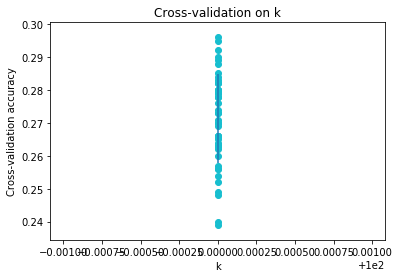

In [16]:
#这部分还有些显示的问题.
# plot the raw observations
for k in k_box:
    accuracies = k_acc[k]
    plt.scatter([k] * len(accuracies), accuracies)

print("k_acc", k_acc)

# plot the trend line with error bars that correspond to standard deviation
accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_acc.items())])
#print("accuracies_mean",accuracies_mean)
accuracies_std = np.array([np.std(v) for k,v in sorted(k_acc.items())])
#print("accuracies_std",accuracies_std)
plt.errorbar(k_box, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()


In [19]:
# knn在处理高纬度数据集时,需要降维.降维有PCA方法,或者是随机投影.
# 高纬度向低纬度的随机投影方法:
from sklearn.random_projection import johnson_lindenstrauss_min_dim
result = johnson_lindenstrauss_min_dim(n_samples=1e6, eps=0.5)
print("result0:", result)
result = johnson_lindenstrauss_min_dim(n_samples=1e6, eps=[0.5, 0.1, 0.01])
print("result1:", result)
result = johnson_lindenstrauss_min_dim(n_samples=[1e4, 1e5, 1e6], eps=0.1)
print("result2:", result)

result0: 663
result1: [    663   11841 1112658]
result2: [ 7894  9868 11841]


In [25]:
import numpy as np
from sklearn import random_projection
X = np.random.rand(100,10000) #从0,1取随机样本.
transformer = random_projection.SparseRandomProjection()
X_new = transformer.fit_transform(X)
#可以看到从100x10000降维到100x3947.
print("X.shape",X.shape)
print("X\n",X)
print("X_new.shape",X_new.shape)
print("X_new",X_new)


X.shape (100, 10000)
X
 [[0.12189387 0.10836246 0.6995041  ... 0.45185423 0.08254548 0.40774326]
 [0.94703627 0.46616193 0.23246703 ... 0.50401688 0.04293534 0.49101288]
 [0.32695212 0.4842908  0.92496265 ... 0.24460814 0.11488013 0.15229207]
 ...
 [0.2115226  0.33919502 0.02657945 ... 0.43360965 0.8627131  0.656972  ]
 [0.95189412 0.59810426 0.75204704 ... 0.77268584 0.27209779 0.84971078]
 [0.30002519 0.9832942  0.58231131 ... 0.13872322 0.63049124 0.15461645]]
X_new.shape (100, 3947)
X_new [[-1.13112061  0.495036   -0.31812409 ...  0.17662862 -0.33911581
  -0.55804471]
 [-1.58881632 -0.15743942  0.47508327 ...  0.45193605  0.83163092
  -1.30491553]
 [-1.05979078  0.21868536  0.56571751 ... -0.04050436  0.27448222
  -1.36489021]
 ...
 [-0.57617657  0.40339042  0.58217702 ...  0.00819866  1.61932587
  -0.01148177]
 [-1.39417022  0.13812966  0.063934   ... -0.33116623  0.6804936
  -0.28475238]
 [-1.76327238  0.58548274  0.2352533  ... -0.3106104   0.84905335
   0.02645609]]
